# 0. Including Libraries

#### 🔹 Basic Python Libraries
- `os`: File and directory operations
- `math`: Mathematical operations
- `random`: Random number generation

#### 🔹 Data Processing Libraries
- `numpy`: Numerical operations and array manipulation
- `sklearn`: Data splitting and metric calculations
- `seaborn`: Statistical data visualization

#### 🔹 Image Processing
- `PIL`: Python Imaging Library

#### 🔹 Deep Learning
- `tensorflow`: Deep learning model creation
- `keras`: High-level neural network API
- `keras_tuner`: Hyperparameter optimization

#### 🔹 Visualization
- `matplotlib`: Data visualization and graph creation

In [1]:
# Core Python libraries
import os
import math
import random

# Data processing and scientific computation
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import seaborn as sns

# Image processing
from PIL import Image

# File operations
import shutil

# Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import (
    Conv2D,
    MaxPooling2D,
    Flatten,
    Dense,
    Dropout,
    Activation,
    BatchNormalization
)
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras_tuner as kt

# Visualization
import matplotlib.pyplot as plt

# 1. Defining Global Variables

#### 🔹 Image and Data Processing Parameters
- `IMAGE_SIZE`: 224 - Pixel size for image resizing
- `BATCH_SIZE`: 32 - Number of images to be processed in each training step
- `NUM_CLASS`: 13 - Number of Simpson characters to be classified

#### 🔹 Training Parameters
- `EPOCHS`: 50 - Number of training cycles for the model
- `TUNER_ITERATIONS`: 2 - Number of 30 trials to be performed for hyperparameter optimization

#### 🔹 Performance Optimization
- `AUTOTUNE`: Parameter used for TensorFlow's automatic performance optimization

In [2]:
IMAGE_SIZE = 224
BATCH_SIZE = 32
NUM_CLASS = 13

EPOCHS = 50
TUNER_ITERATIONS = 2

AUTOTUNE = tf.data.AUTOTUNE

# 2. Dataset Analysis

The distribution of Simpson characters in the dataset is analyzed and displayed in a pie chart.

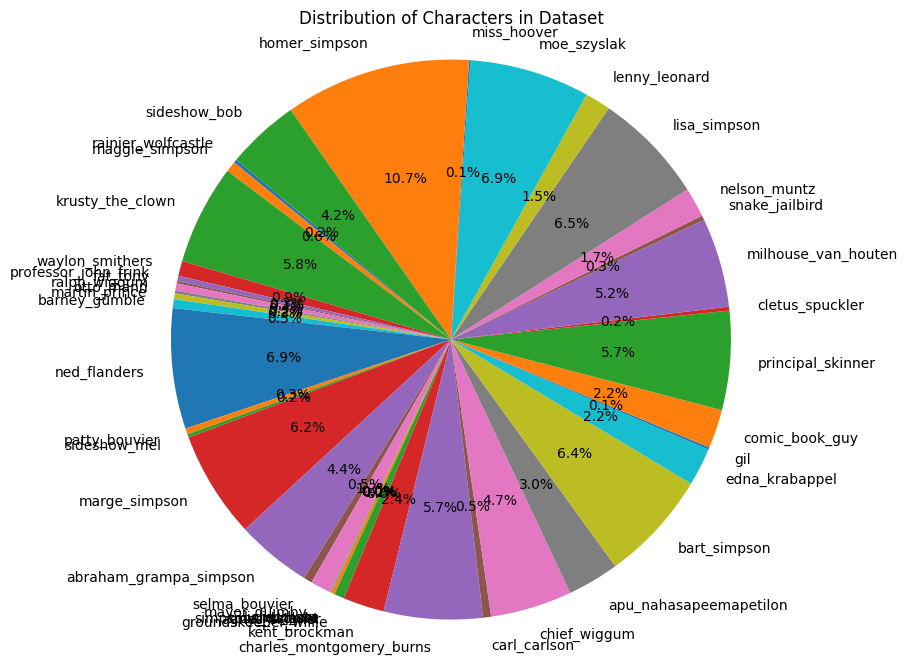

In [3]:
input_dir = "/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset"

character_counts = {}

for character_folder in os.listdir(input_dir):
    character_folder_path = os.path.join(input_dir, character_folder)

    if os.path.isdir(character_folder_path):
        num_files = len([f for f in os.listdir(character_folder_path) if os.path.isfile(os.path.join(character_folder_path, f))])

        character_counts[character_folder] = num_files

plt.figure(figsize=(10, 8))
plt.pie(character_counts.values(), labels=character_counts.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Characters in Dataset')
plt.axis('equal')
plt.show()

In [4]:
sorted_counts = sorted(character_counts.items(), key=lambda x: x[1])
print("Number of images per character (Ascending Order):")
for character, count in sorted_counts:
    print(f"{character}: {count} images")

Number of images per character (Ascending Order):
simpsons_dataset: 0 images
lionel_hutz: 3 images
disco_stu: 8 images
troy_mcclure: 8 images
miss_hoover: 17 images
fat_tony: 27 images
gil: 27 images
otto_mann: 32 images
sideshow_mel: 40 images
agnes_skinner: 42 images
rainier_wolfcastle: 45 images
cletus_spuckler: 47 images
snake_jailbird: 55 images
professor_john_frink: 65 images
martin_prince: 71 images
patty_bouvier: 72 images
ralph_wiggum: 89 images
carl_carlson: 98 images
selma_bouvier: 103 images
barney_gumble: 106 images
groundskeeper_willie: 121 images
maggie_simpson: 128 images
waylon_smithers: 181 images
mayor_quimby: 246 images
lenny_leonard: 310 images
nelson_muntz: 358 images
edna_krabappel: 457 images
comic_book_guy: 469 images
kent_brockman: 498 images
apu_nahasapeemapetilon: 623 images
sideshow_bob: 877 images
abraham_grampa_simpson: 913 images
chief_wiggum: 986 images
milhouse_van_houten: 1079 images
charles_montgomery_burns: 1193 images
principal_skinner: 1194 images

# 3. Dataset Partitioning

Images for each character are divided into 70% Train, 15% Validation, and 15% Test sets.

#### Selected Characters
- Sideshow Bob
- Abraham (Grampa) Simpson
- Chief Wiggum
- Milhouse Van Houten
- Charles Montgomery Burns
- Principal Skinner
- Krusty the Clown
- Marge Simpson
- Bart Simpson
- Lisa Simpson
- Moe Szyslak
- Ned Flanders
- Homer Simpson

In [5]:
allowed_classes = [
    "sideshow_bob", "abraham_grampa_simpson", "chief_wiggum", "milhouse_van_houten",
    "charles_montgomery_burns", "principal_skinner", "krusty_the_clown", "marge_simpson",
    "bart_simpson", "lisa_simpson", "moe_szyslak", "ned_flanders", "homer_simpson"
]

input_dir = "/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset"
output_dir = "./dataset_filtered"

os.makedirs(output_dir, exist_ok=True)
train_dir = os.path.join(output_dir, 'train')
val_dir = os.path.join(output_dir, 'val')
test_dir = os.path.join(output_dir, 'test')
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

for class_name in allowed_classes:
    class_path = os.path.join(input_dir, class_name)
    all_images = sorted(os.listdir(class_path))
    train_files, temp_files = train_test_split(all_images, train_size=0.7, random_state=42)
    val_files, test_files = train_test_split(temp_files, test_size=0.15 / (1 - 0.7), random_state=42)

    for subset, subset_files in zip(['train', 'val', 'test'], [train_files, val_files, test_files]):
        subset_class_dir = os.path.join(output_dir, subset, class_name)
        os.makedirs(subset_class_dir, exist_ok=True)

        for file_name in subset_files:
            src_file = os.path.join(class_path, file_name)
            dst_file = os.path.join(subset_class_dir, file_name)
            shutil.copy(src_file, dst_file)

    print(f"Processing completed for '{class_name}'.")

Processing completed for 'sideshow_bob'.
Processing completed for 'abraham_grampa_simpson'.
Processing completed for 'chief_wiggum'.
Processing completed for 'milhouse_van_houten'.
Processing completed for 'charles_montgomery_burns'.
Processing completed for 'principal_skinner'.
Processing completed for 'krusty_the_clown'.
Processing completed for 'marge_simpson'.
Processing completed for 'bart_simpson'.
Processing completed for 'lisa_simpson'.
Processing completed for 'moe_szyslak'.
Processing completed for 'ned_flanders'.
Processing completed for 'homer_simpson'.


# 4. Calculation of Class Weights

Due to unequal number of images, weights are calculated for each character based on their representation in the dataset.

In [6]:
def calculate_class_weights(allowed_classes, character_counts):
    class_weights = {}
    max_samples = max(character_counts[class_name] for class_name in allowed_classes)
    
    for idx, class_name in enumerate(allowed_classes):
        weight = max_samples / character_counts[class_name]
        class_weights[idx] = weight
    
    return class_weights

class_weights = calculate_class_weights(allowed_classes, character_counts)

print("\nClass Weights:")
for idx, class_name in enumerate(allowed_classes):
    print(f"{class_name}: {class_weights[idx]:.2f} (Number of images: {character_counts[class_name]})")


Class Weights:
sideshow_bob: 2.56 (Number of images: 877)
abraham_grampa_simpson: 2.46 (Number of images: 913)
chief_wiggum: 2.28 (Number of images: 986)
milhouse_van_houten: 2.08 (Number of images: 1079)
charles_montgomery_burns: 1.88 (Number of images: 1193)
principal_skinner: 1.88 (Number of images: 1194)
krusty_the_clown: 1.86 (Number of images: 1206)
marge_simpson: 1.74 (Number of images: 1291)
bart_simpson: 1.67 (Number of images: 1342)
lisa_simpson: 1.66 (Number of images: 1354)
moe_szyslak: 1.55 (Number of images: 1452)
ned_flanders: 1.54 (Number of images: 1454)
homer_simpson: 1.00 (Number of images: 2246)


# 5. Visualization of Characters in the Dataset

Random images from each character in the given directory are selected and visualized in a grid format.

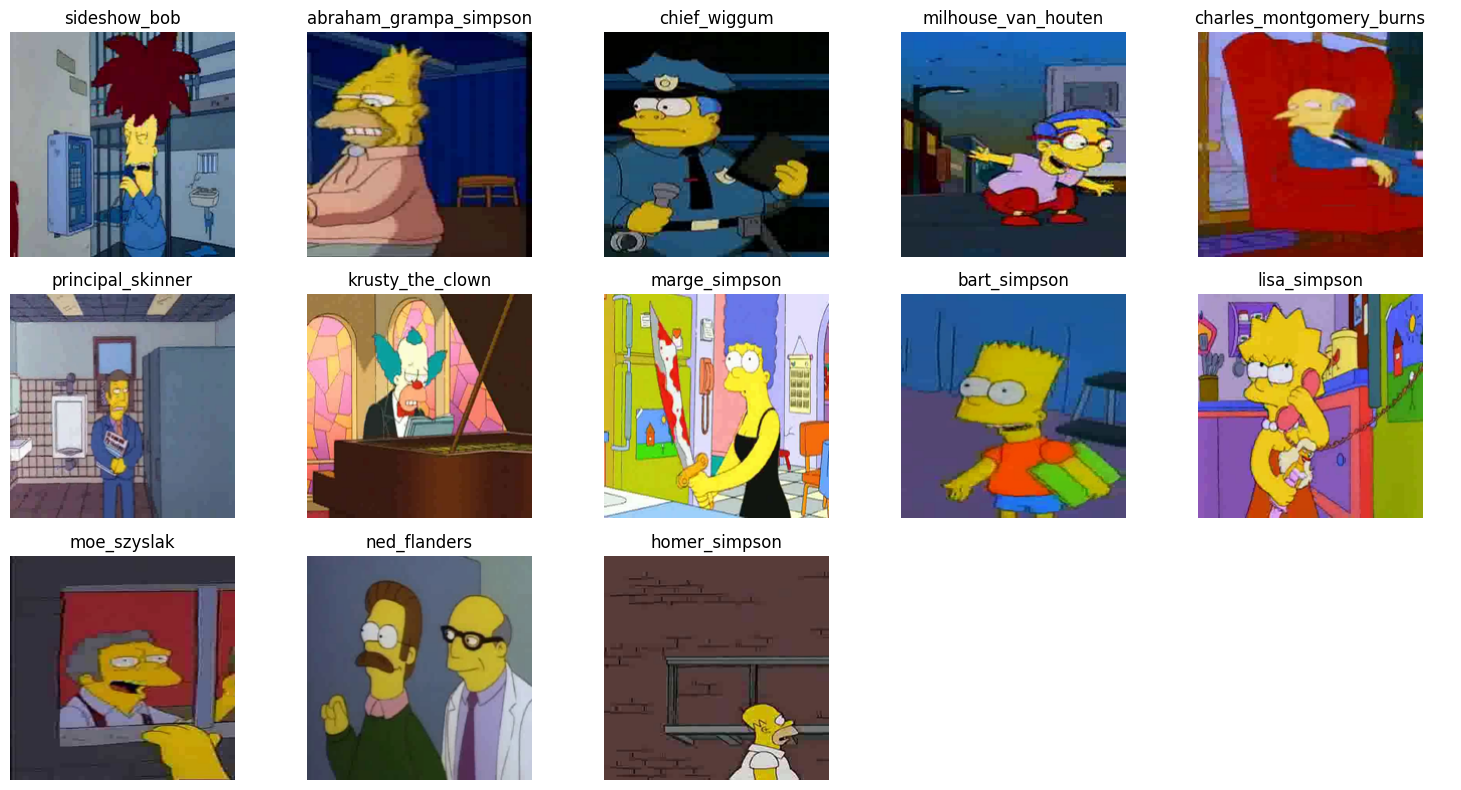

In [7]:
def visualize_random_images(output_dir, allowed_classes, img_size=(224, 224), num_cols=5, figsize=(15, 8)):
    images = []
    for character in allowed_classes:
        class_path = os.path.join(output_dir, character)
        img_files = os.listdir(class_path)
        selected_img = random.choice(img_files)
        img_path = os.path.join(class_path, selected_img)

        img = Image.open(img_path).resize(img_size)
        images.append(img)

    num_rows = math.ceil(len(allowed_classes) / num_cols)

    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)

    for i, (img, label) in enumerate(zip(images, allowed_classes)):
        row, col = divmod(i, num_cols)
        axes[row, col].imshow(img)
        axes[row, col].set_title(label)
        axes[row, col].axis('off')

    for i in range(len(allowed_classes), num_rows * num_cols):
        row, col = divmod(i, num_cols)
        axes[row, col].axis('off')

    plt.tight_layout()
    plt.show()

visualize_random_images(test_dir, allowed_classes)

# 6. Creation of TensorFlow Datasets

#### Parameters
- `image_size`: (224, 224) - Ensures all images are scaled to 224x224 dimensions
- `batch_size`: 64 - Determines the number of images to be processed in each iteration
- `seed`: 42 - Sets a fixed seed value for reproducibility
- `label_mode`: "int" - Ensures labels are encoded as integers
- `labels`: "inferred" - Enables automatic label extraction from folder structure
- `color_mode`: "rgb" - Ensures images are loaded in RGB format

In [8]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    seed=42,
    label_mode="int",
    labels="inferred",
    color_mode="rgb",
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    seed=42,
    label_mode="int",
    labels="inferred",
    color_mode="rgb",
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    seed=42,
    label_mode="int",
    labels="inferred",
    color_mode="rgb",
)

class_names = train_dataset.class_names

Found 11605 files belonging to 13 classes.
Found 2489 files belonging to 13 classes.
Found 2493 files belonging to 13 classes.


# 7. Data Normalization

We normalize pixel values from the 0-255 range to 0-1 range to enable more effective model learning.

In [9]:
normalization = tf.keras.layers.Rescaling(1./255)

train_dataset = train_dataset.map(lambda x, y: (normalization(x), y))
validation_dataset = validation_dataset.map(lambda x, y: (normalization(x), y))
test_dataset = test_dataset.map(lambda x, y: (normalization(x), y))

# 8. Data Loading Performance Optimization

#### Cache
- Data is stored in RAM using the `.cache()` method
- Data is read and kept in memory during the first epoch
- No repeated disk reading in subsequent epochs

#### Prefetch
- Next batch is prepared in advance using `.prefetch()`
- TensorFlow performs automatic optimization with `AUTOTUNE` parameter
- CPU prepares the next data while GPU processes the current batch

In [10]:
train_dataset = train_dataset.cache().prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.cache().prefetch(buffer_size=AUTOTUNE)

# 9. Model Architecture and Hyperparameter Optimization

Our CNN model's architecture and hyperparameter search space are defined. Keras Tuner is used to find the optimal model parameters.

### 🔹 Model Structure

#### Input Layer
- Image size: 224x224x3 (RGB)

#### Convolution Blocks
- Dynamic number of convolution layers (1-6)
- Each block contains:
  - Conv2D (number of filters doubles in each layer: 32, 64, 128, ...)
  - Batch Normalization
  - ReLU activation
  - MaxPooling2D
  - Dropout (0.2)

#### Output Layers
- Global Average Pooling
- Dense layer (32-1024 neurons)
- Batch Normalization
- Dropout (0.5)
- Softmax output layer (13 classes)

### 🔹 Optimized Hyperparameters

#### Model Structure
- `conv_layers`: Number of convolution layers (1-6)
- `units`: Number of neurons in dense layer (32-1024)

#### Training Parameters
- `learning_rate`: Learning rate (1e-5 - 1e-3)

In [11]:
def build_model(hp):
    model = tf.keras.models.Sequential()

    # Optimized Parameters
    hp_conv_layer_count = hp.Int("conv_layers", min_value=1, max_value=6, step=1)
    hp_learning_rate = hp.Choice("learning_rate", values=[1e-3, 5e-4, 1e-4, 5e-5, 1e-5])
    hp_units = hp.Int("units", min_value=32, max_value=1024, step=32)

    # Input Layer
    model.add(tf.keras.layers.Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
    
    # Convolutional Blocks
    for i in range(hp_conv_layer_count):
        model.add(tf.keras.layers.Conv2D(
            int(32 * (2**i)),
            (3,3),
            padding='same',
            activation=None
        ))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.ReLU())
        model.add(tf.keras.layers.MaxPooling2D((2,2)))
        model.add(tf.keras.layers.Dropout(0.2))

    # Output Layers
    model.add(tf.keras.layers.GlobalAveragePooling2D())
    model.add(tf.keras.layers.Dense(
        hp_units,
        activation="relu"
    ))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(
        NUM_CLASS,
        activation="softmax",
        name="output"
    ))

    # Model Compilation
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
        metrics=[tf.keras.metrics.SparseCategoricalAccuracy(name="accuracy")],
    )
    
    return model

# 10. Hyperband Tuner Configuration and Callback Definitions

### 🔹 Hyperband Settings
- `build_model`: Model creation function defined in previous section
- `objective`: 'val_loss' (Optimization target)
- `max_epochs`: 10 (Maximum number of epochs per trial)
- `hyperband_iterations`: 2 (Number of Hyperband iterations)
- `factor`: 3 (Resource allocation multiplier)

### 🔹 Callback Settings

#### EarlyStopping
- `monitor='val_loss'`: Monitors validation loss
- `patience=5`: Stops training if no improvement for 5 epochs

#### ReduceLROnPlateau
- `monitor='val_loss'`: Tracks validation loss
- `factor=0.5`: Reduces learning rate by half
- `patience=2`: Decreases learning rate if no improvement for 2 epochs
- `min_lr=1e-6`: Minimum learning rate limit

In [12]:
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=10,
    hyperband_iterations=TUNER_ITERATIONS,
    factor=3
)

tuner_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5),
    tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=2, min_lr=1e-6)
]

# 11. Initiating Hyperparameter Search Process

### 🔹 Search Parameters

#### Datasets
- `train_dataset`: Training dataset
- `validation_dataset`: Validation dataset

#### Training Settings
- `epochs`: 10 (Maximum number of epochs per trial)
- `callbacks`: Previously defined tuner_callbacks
  - Early Stopping
  - ReduceLROnPlateau
- `class_weight`: Previously defined weights for each character

### Search Process
1. Different hyperparameter combinations are tested
2. Model is trained for each combination
3. Evaluation is performed based on validation performance
4. Best performing configurations are determined

In [13]:
tuner.search(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=tuner_callbacks,    
    class_weight=class_weights
    )

Trial 60 Complete [00h 00m 59s]
val_accuracy: 0.2985134720802307

Best val_accuracy So Far: 0.9200482368469238
Total elapsed time: 00h 58m 57s


# 12. Retrieving and Reporting Best Hyperparameters

The model configuration that showed the best performance during the hyperparameter search process is reported in detail.

In [14]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
Hyperparameter search completed.

Best model parameters:
--------------------------------
• Number of neurons in first dense layer: {best_hps.get('units')}
• Optimizer learning rate: {best_hps.get('learning_rate')}
• Number of convolutional layers: {best_hps.get('conv_layers')}

Model architecture summary:
--------------------------------
• Total convolutional layer blocks: {best_hps.get('conv_layers')}
• Each block: Conv2D -> BatchNorm -> ReLU -> MaxPool -> Dropout
• Convolution filters: 32, 64, 128, ... (doubles at each layer)
• Dense layer with {best_hps.get('units')} neurons in final layer
• Output layer: softmax for {NUM_CLASS} classes
""")


Hyperparameter search completed.

Best model parameters:
--------------------------------
• Number of neurons in first dense layer: 576
• Optimizer learning rate: 0.001
• Number of convolutional layers: 6

Model architecture summary:
--------------------------------
• Total convolutional layer blocks: 6
• Each block: Conv2D -> BatchNorm -> ReLU -> MaxPool -> Dropout
• Convolution filters: 32, 64, 128, ... (doubles at each layer)
• Dense layer with 576 neurons in final layer
• Output layer: softmax for 13 classes



# 13. Creating the Best Model Structure

The best model is created using the optimal hyperparameters found by the Hyperband tuner, and the structural summary of the model is displayed.

In [15]:
model = tuner.hypermodel.build(best_hps)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 224, 224, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 224, 224, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 112, 112, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_2 (ReLU)                       │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_3 (ReLU)                       │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 28, 28, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_4 (ReLU)                       │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 6,896,461 (26.31 MB)

 Trainable params: 6,891,277 (26.29 MB)

 Non-trainable params: 5,184 (20.25 KB)

# 14. Defining Training Callbacks

Callbacks monitor, record, and optimize the training process.

### 🔹 Defined Callbacks

#### 1. Early Stopping
- Monitors validation loss
- Stops if no improvement for 10 epochs
- Restores best weights

#### 2. ReduceLROnPlateau
- Dynamically adjusts learning rate
- Checks every 2 epochs
- Minimum learning rate: 1e-6

#### 3. ModelCheckpoint
- Automatically saves the best model
- Stores complete model structure
- Only saves the best performance

In [16]:
checkpoint_name = "Epoch{epoch:03d}-ValLoss{val_loss:.4f}-ValAcc{val_accuracy:.4f}.keras"

train_callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=10,
        restore_best_weights=True
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=2, verbose=1, min_lr=1e-6
    ),
    tf.keras.callbacks.ModelCheckpoint(
        checkpoint_name, monitor='val_loss', verbose=1, save_best_only=True, mode='auto', save_weights_only=False
    ),
]

# 15. Initiating Model Training

The model is trained on training and validation datasets for the specified number of epochs.

### 🔹 Training Parameters
- **Training Dataset**: `train_dataset`
- **Number of Epochs**: 50 (defined in EPOCHS variable)
- **Validation Dataset**: `validation_dataset`
- **Callbacks**: Previously defined `train_callbacks`

### 🔹 Metrics Monitored During Training
- Training loss
- Training accuracy
- Validation loss
- Validation accuracy

In [17]:
history = model.fit(
    train_dataset,
    epochs=EPOCHS,
    validation_data=validation_dataset,
    callbacks=train_callbacks,
    class_weight=class_weights
    )

Epoch 1/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.2608 - loss: 4.7076
Epoch 1: val_loss improved from inf to 2.07613, saving model to Epoch001-ValLoss2.0761-ValAcc0.3290.keras
363/363 ━━━━━━━━━━━━━━━━━━━━ 57s 128ms/step - accuracy: 0.2611 - loss: 4.7050 - val_accuracy: 0.3290 - val_loss: 2.0761 - learning_rate: 0.0010
Epoch 2/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6413 - loss: 2.1257
Epoch 2: val_loss improved from 2.07613 to 1.29889, saving model to Epoch002-ValLoss1.2989-ValAcc0.6428.keras
363/363 ━━━━━━━━━━━━━━━━━━━━ 16s 44ms/step - accuracy: 0.6415 - loss: 2.1249 - val_accuracy: 0.6428 - val_loss: 1.2989 - learning_rate: 0.0010
Epoch 3/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7911 - loss: 1.2609
Epoch 3: val_loss did not improve from 1.29889
363/363 ━━━━━━━━━━━━━━━━━━━━ 16s 43ms/step - accuracy: 0.7911 - loss: 1.2607 - val_accuracy: 0.5749 - val_loss: 1.5826 - learning_rate: 0.0010
Epoch 4/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 41

# 16. Visualization of Training Results and Model Evaluation

### 🔹 Loss Graph
- Shows the change in training and validation losses across epochs.

### 🔹 Accuracy Graph
- Shows the change in training and validation accuracy rates across epochs.

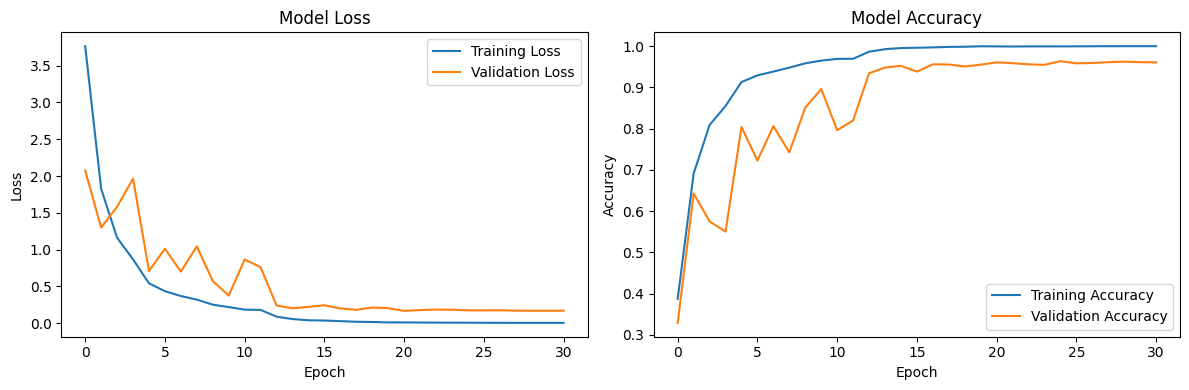

In [18]:
# Visualizes training results
plt.figure(figsize=(12, 4))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# 17. Model Evaluation on Test Dataset

The model's actual performance is measured on previously unseen data.

### 🔹 Evaluation Parameters
- **Dataset**: `test_dataset` (data not used during training)
- **Verbose**: 1 (progress bar display active)
- **Output Format**: 4 decimal places

### 🔹 Measured Metrics
1. **Test Loss**
   - Amount of deviation of model predictions from actual values

2. **Test Accuracy**
   - Percentage of correctly predicted samples
   - A value between 0 and 1 (1 = 100% accuracy)

In [19]:
test_loss, test_accuracy = model.evaluate(test_dataset, verbose=1)
print(f"\nTest accuracy: {test_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")

78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.9531 - loss: 0.1845

Test accuracy: 0.9515
Test loss: 0.1810


# 18. Confusion Matrix

We create and visualize a confusion matrix to analyze the prediction performance of the model in detail for each Simpson character.

### 🔹 Data Preparation
- Predictions are made in batches on the test dataset
- Predictions and actual labels are converted to NumPy arrays
- Softmax outputs are converted to the class with highest probability

### 🔹 Matrix Analysis
- Diagonal values: Correct Classifications
- Off-diagonal values: Misclassifications
- Dark colored cells: High frequency
- Light colored cells: Low frequency

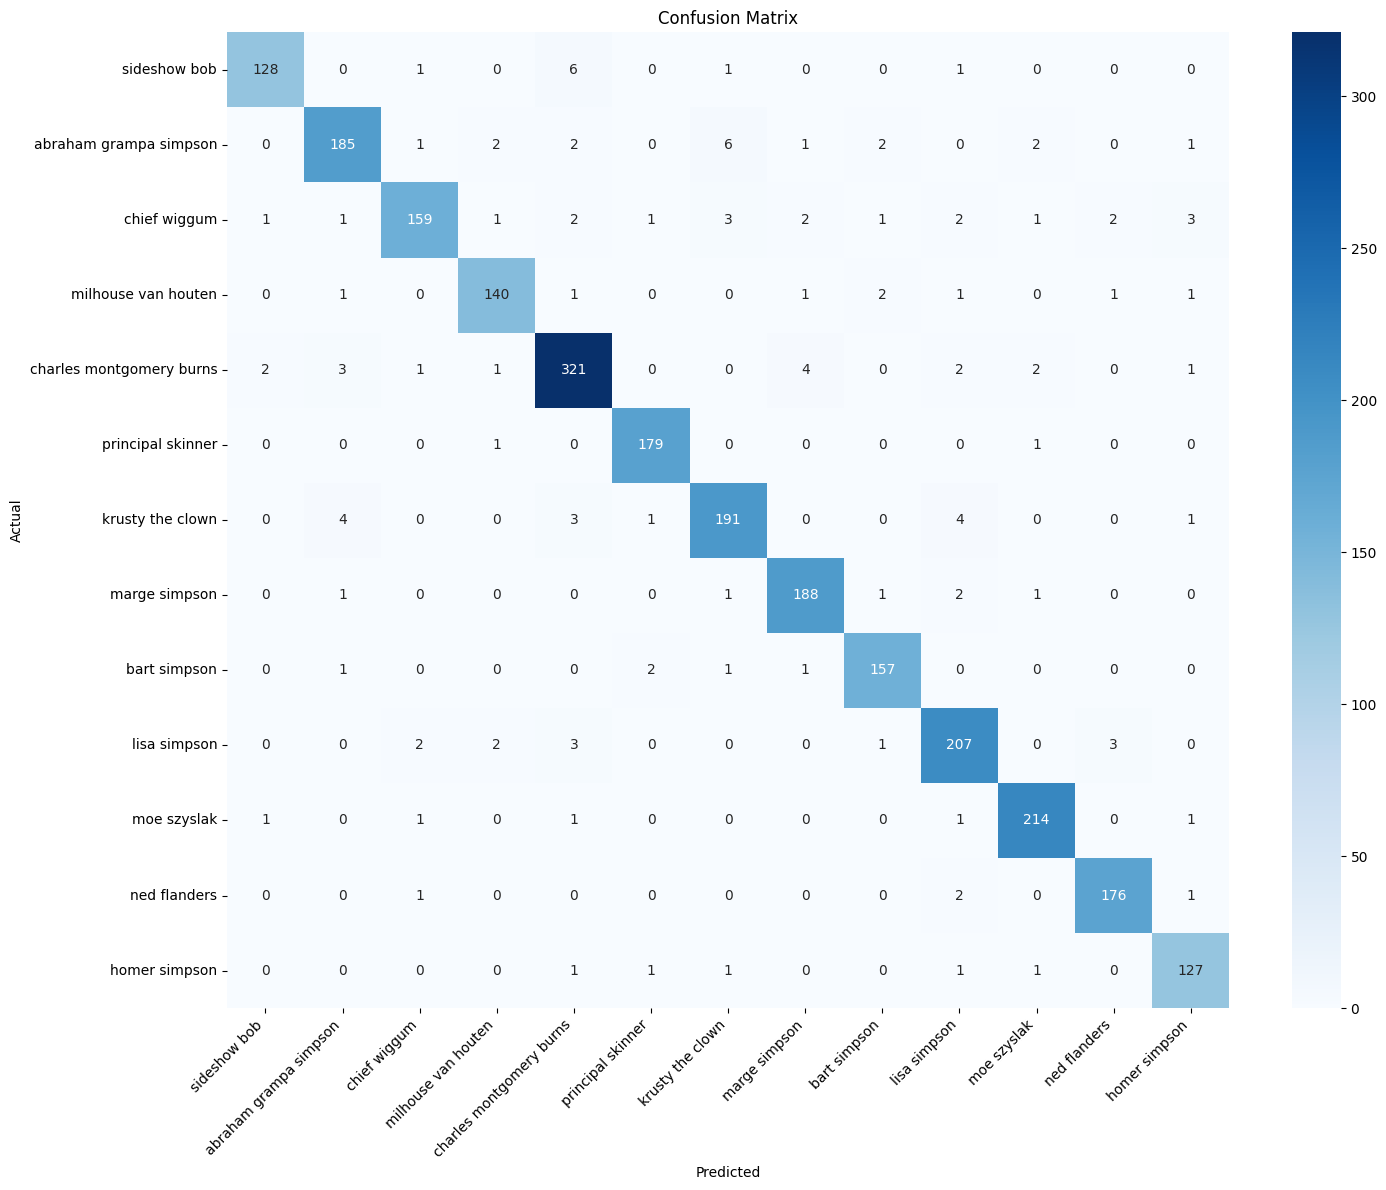

In [20]:
y_true = []
y_pred = []

for batch_images, batch_labels in test_dataset:
    batch_predictions = model.predict(batch_images, verbose=0)
    batch_pred_labels = np.argmax(batch_predictions, axis=1)

    y_true.extend(batch_labels.numpy())
    y_pred.extend(batch_pred_labels)

y_true = np.array(y_true)
y_pred = np.array(y_pred)

plt.figure(figsize=(15, 12))
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=[name.replace('_', ' ') for name in allowed_classes],
            yticklabels=[name.replace('_', ' ') for name in allowed_classes])

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 19. Detailed Performance Analysis

Precision, recall, and f1-score metrics are calculated and visualized for each Simpson character in the created model.

In [21]:
print("\nDetaylı Performans Raporu:")
print(classification_report(
    y_true,
    y_pred,
    target_names=[name.replace('_', ' ') for name in allowed_classes],
    digits=4
))


Detaylı Performans Raporu:
                          precision    recall  f1-score   support

            sideshow bob     0.9697    0.9343    0.9517       137
  abraham grampa simpson     0.9439    0.9158    0.9296       202
            chief wiggum     0.9578    0.8883    0.9217       179
     milhouse van houten     0.9524    0.9459    0.9492       148
charles montgomery burns     0.9441    0.9525    0.9483       337
       principal skinner     0.9728    0.9890    0.9808       181
        krusty the clown     0.9363    0.9363    0.9363       204
           marge simpson     0.9543    0.9691    0.9616       194
            bart simpson     0.9573    0.9691    0.9632       162
            lisa simpson     0.9283    0.9495    0.9388       218
             moe szyslak     0.9640    0.9772    0.9705       219
            ned flanders     0.9670    0.9778    0.9724       180
           homer simpson     0.9338    0.9621    0.9478       132

                accuracy                      


Detailed Performance Report:
                          precision    recall  f1-score   support

            sideshow bob     0.9697    0.9343    0.9517       137
  abraham grampa simpson     0.9439    0.9158    0.9296       202
            chief wiggum     0.9578    0.8883    0.9217       179
     milhouse van houten     0.9524    0.9459    0.9492       148
charles montgomery burns     0.9441    0.9525    0.9483       337
       principal skinner     0.9728    0.9890    0.9808       181
        krusty the clown     0.9363    0.9363    0.9363       204
           marge simpson     0.9543    0.9691    0.9616       194
            bart simpson     0.9573    0.9691    0.9632       162
            lisa simpson     0.9283    0.9495    0.9388       218
             moe szyslak     0.9640    0.9772    0.9705       219
            ned flanders     0.9670    0.9778    0.9724       180
           homer simpson     0.9338    0.9621    0.9478       132

                accuracy                    

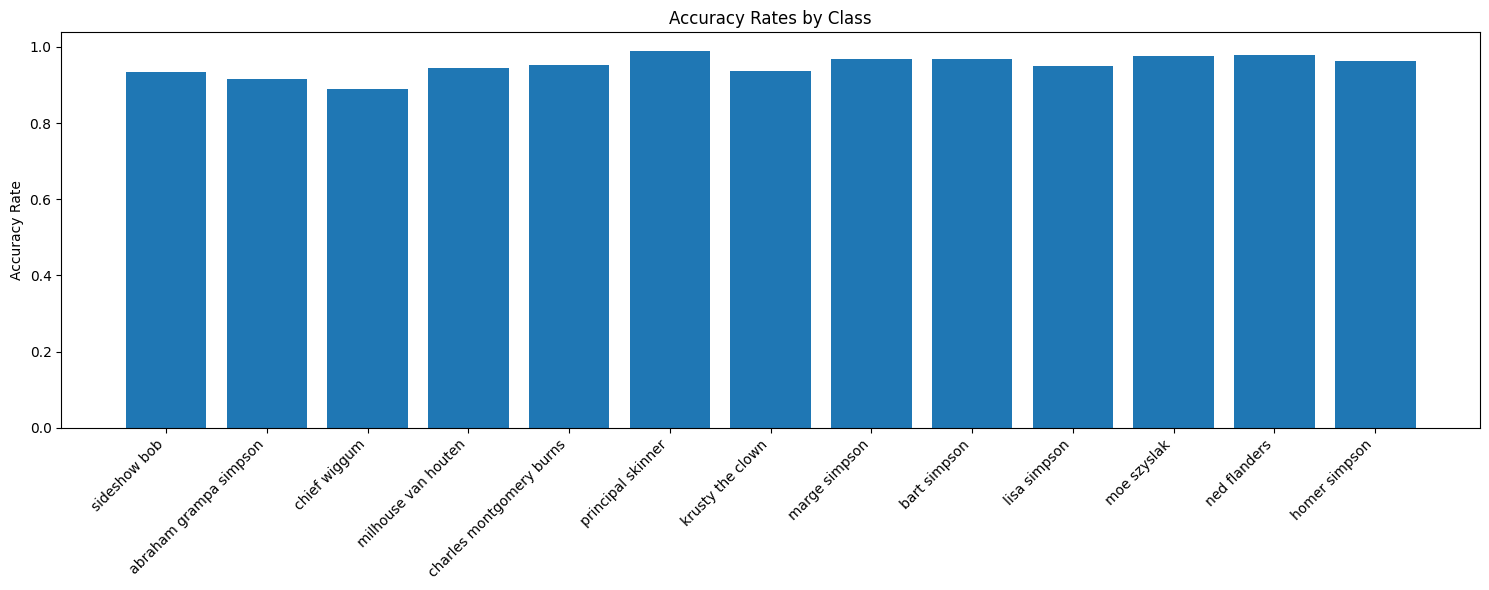

In [22]:
print("\nDetailed Performance Report:")
print(classification_report(
    y_true,
    y_pred,
    target_names=[name.replace('_', ' ') for name in allowed_classes],
    digits=4
))

class_accuracies = {}
for i, class_name in enumerate(allowed_classes):
    class_mask = (y_true == i)
    class_accuracy = np.mean(y_pred[class_mask] == i)
    class_accuracies[class_name] = class_accuracy

plt.figure(figsize=(15, 6))
plt.bar(
    [name.replace('_', ' ') for name in allowed_classes],
    [class_accuracies[name] for name in allowed_classes]
)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Accuracy Rate')
plt.title('Accuracy Rates by Class')
plt.tight_layout()
plt.show()

In [23]:
print("\nAccuracy Rates by Class:")
for class_name in allowed_classes:
    print(f"{class_name.replace('_', ' ')}: {class_accuracies[class_name]:.4f}")


Accuracy Rates by Class:
sideshow bob: 0.9343
abraham grampa simpson: 0.9158
chief wiggum: 0.8883
milhouse van houten: 0.9459
charles montgomery burns: 0.9525
principal skinner: 0.9890
krusty the clown: 0.9363
marge simpson: 0.9691
bart simpson: 0.9691
lisa simpson: 0.9495
moe szyslak: 0.9772
ned flanders: 0.9778
homer simpson: 0.9621
